In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import datetime
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv("brain_stroke.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
#df = df.drop(df[df.score < 50].index)
stroke = data.drop(data[data.stroke == 0].index)

In [7]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<AxesSubplot:xlabel='age', ylabel='bmi'>

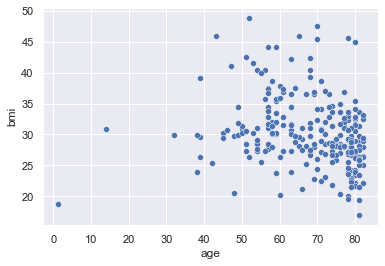

In [9]:
sb.scatterplot(data=stroke, x='age', y='bmi')

In [20]:
clean_stroke = stroke[['age','bmi']]
clean_stroke

,age,bmi
0,67.0,36.6
1,80.0,32.5
2,49.0,34.4
3,79.0,24.0
4,81.0,29.0
...,...,...
4815,79.0,27.2
4816,74.0,28.7
4817,76.0,31.7
4818,74.0,28.1


In [13]:
from sklearn.cluster import DBSCAN

In [37]:
from plotnine import *

C:\Users\Trevor\AppData\Local\Temp\ipykernel_23604\1980232580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


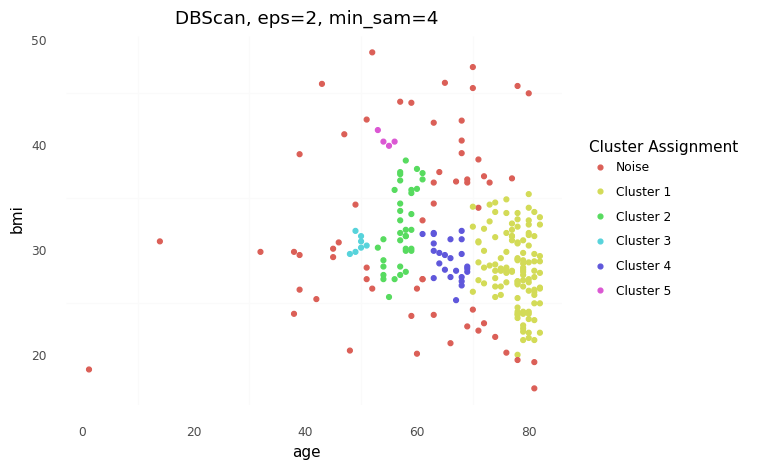

<ggplot: (129453330710)>

In [41]:
clust = DBSCAN(eps=2, min_samples=4).fit(clean_stroke)
labelList = ["Noise"]
labelList = labelList + ["Cluster " + str(i) for i in range(1, len(set(clust.labels_)))]

clean_stroke["assignments"] = clust.labels_
(ggplot(clean_stroke, aes(x='age', y='bmi', color='factor(assignments)')) + 
geom_point() + theme_minimal() + scale_color_discrete(name = 'Cluster Assignment',
                                                     labels = labelList) +
theme(panel_grid_major = element_blank()) + 
labs(title = 'DBScan, eps=2, min_sam=4'))


In [46]:
stroke['ass'] = clust.labels_

In [47]:
pd.set_option('display.max_rows', None)

In [49]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ass
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,-1
1,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
2,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,-1
3,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
4,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0
5,Male,74.00,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,0
6,Female,69.00,0,0,No,Private,Urban,94.39,22.8,never smoked,1,-1
7,Female,78.00,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,0
8,Female,81.00,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,0
9,Female,61.00,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,1


In [59]:
strokeNoise = stroke[stroke['ass'] == -1]
stroke0 = stroke[stroke['ass'] == 0]
stroke1 = stroke[stroke['ass'] == 1]
stroke2 = stroke[stroke['ass'] == 2]
stroke3 = stroke[stroke['ass'] == 3]
stroke4 = stroke[stroke['ass'] == 4]
stroke5 = stroke[stroke['ass'] == 5]

In [68]:
print(len(strokeNoise))
print(len(stroke0))
print(len(stroke1))
print(len(stroke2))
print(len(stroke3))
print(len(stroke4))
print(len(stroke5))

60
117
36
7
24
4
0


<AxesSubplot:xlabel='age', ylabel='bmi'>

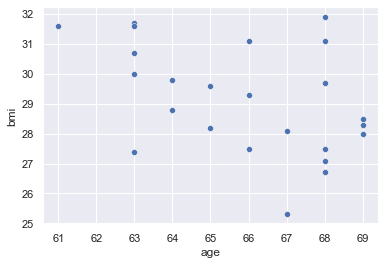

In [61]:
#sb.scatterplot(data=strokeNoise, x='age', y='bmi')
#sb.scatterplot(data=stroke0, x='age', y='bmi')
#sb.scatterplot(data=stroke1, x='age', y='bmi')
#sb.scatterplot(data=stroke2, x='age', y='bmi')
sb.scatterplot(data=stroke3, x='age', y='bmi')
#sb.scatterplot(data=stroke4, x='age', y='bmi')
#sb.scatterplot(data=stroke5, x='age', y='bmi')